In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import fftlog
import twobessel
from dark_emulator_public import dark_emulator as de

In [7]:
emu = de.darkemu.base_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [22]:
k = np.logspace(-5, 3, 1024)
pklin = emu.get_pklin_from_z(k, 0.0)

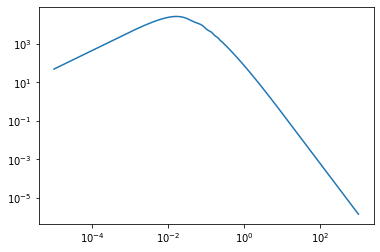

In [23]:
plt.figure()
plt.loglog(k, pklin)
plt.show()

In [32]:
np.savetxt('pklin.txt', np.array([k, pklin]).T)

In [29]:
%%time
f = fftlog.fftlog(k, pklin*k**3, nu=1.01, N_extrap_low=512, N_extrap_high=512, c_window_width=0.25)
r, xi = f.fftlog(0)
xi /= 2*np.pi**2

512 2048 512
CPU times: user 2.28 ms, sys: 72 µs, total: 2.36 ms
Wall time: 2.08 ms


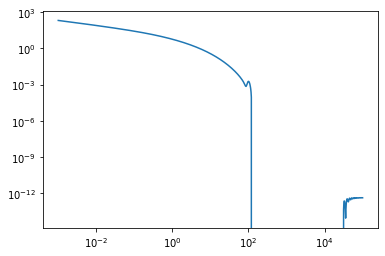

In [30]:
plt.figure()
plt.loglog(r, xi)
plt.show()

In [31]:
np.savetxt('xi.txt', np.array([r, xi]).T)